In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('../data/world_happiness_2015_2023.csv')

In [19]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [20]:
display(df.head())
display(df.info())

,country,region,happiness_rank,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,year
0,Afghanistan,Southern Asia,153,3.5750,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015
1,Afghanistan,Southern Asia,154,3.3600,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016
2,Afghanistan,Southern Asia,141,3.7940,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017
3,Afghanistan,Southern Asia,145,3.6315,0.331814,0.537191,0.254772,0.084552,0.036268,0.191004,2.195918,2018
4,Afghanistan,Southern Asia,154,3.2033,0.349631,0.517003,0.360616,0.000000,0.024875,0.158151,1.793060,2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        1366 non-null   object 
 1   region                         1366 non-null   object 
 2   happiness_rank                 1366 non-null   int64  
 3   happiness_score                1366 non-null   float64
 4   economy_(gdp_per_capita)       1366 non-null   float64
 5   family                         1366 non-null   float64
 6   health_(life_expectancy)       1366 non-null   float64
 7   freedom                        1366 non-null   float64
 8   trust_(government_corruption)  1366 non-null   float64
 9   generosity                     1366 non-null   float64
 10  dystopia_residual              1366 non-null   float64
 11  year                           1366 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage:

None

In [21]:
print(df.isnull().sum())

country                          0
region                           0
happiness_rank                   0
happiness_score                  0
economy_(gdp_per_capita)         0
family                           0
health_(life_expectancy)         0
freedom                          0
trust_(government_corruption)    0
generosity                       0
dystopia_residual                0
year                             0
dtype: int64


In [12]:
missing_cols = df.columns[df.isnull().any()].tolist()
for col in missing_cols:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

missing_after = df[missing_cols].isnull().sum()
print(missing_after)

Life Expectancy    0
dtype: int64


EDA

In [22]:
display(df.describe())

,happiness_rank,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,year
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,76.561493,5.441466,1.018862,1.045517,0.584113,0.451071,0.132358,0.196422,2.013121,2018.900439
std,44.100570,1.118228,0.453085,0.331198,0.245165,0.156836,0.112549,0.113314,0.572140,2.559541
min,1.000000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.109798,2015.000000
25%,38.250000,4.598025,0.696481,0.832252,0.402301,0.356187,0.056836,0.115073,1.673810,2017.000000
50%,76.000000,5.448100,1.041874,1.083231,0.612830,0.467778,0.097360,0.182595,2.025513,2019.000000
75%,114.000000,6.257050,1.338652,1.299045,0.777614,0.569412,0.166351,0.252930,2.390477,2021.000000
max,158.000000,7.842100,2.209395,1.644378,1.140899,0.771510,0.586828,0.838075,3.837720,2023.000000


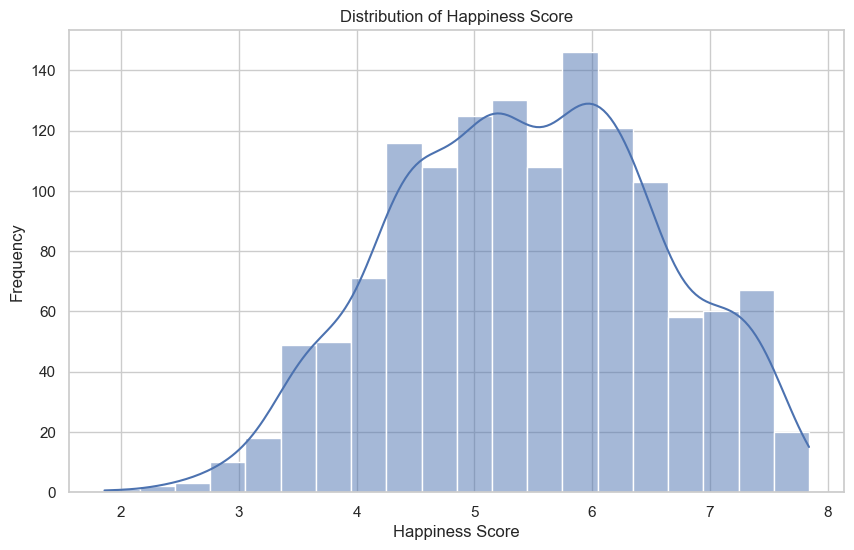

In [24]:
sns.histplot(df['happiness_score'], bins=20, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

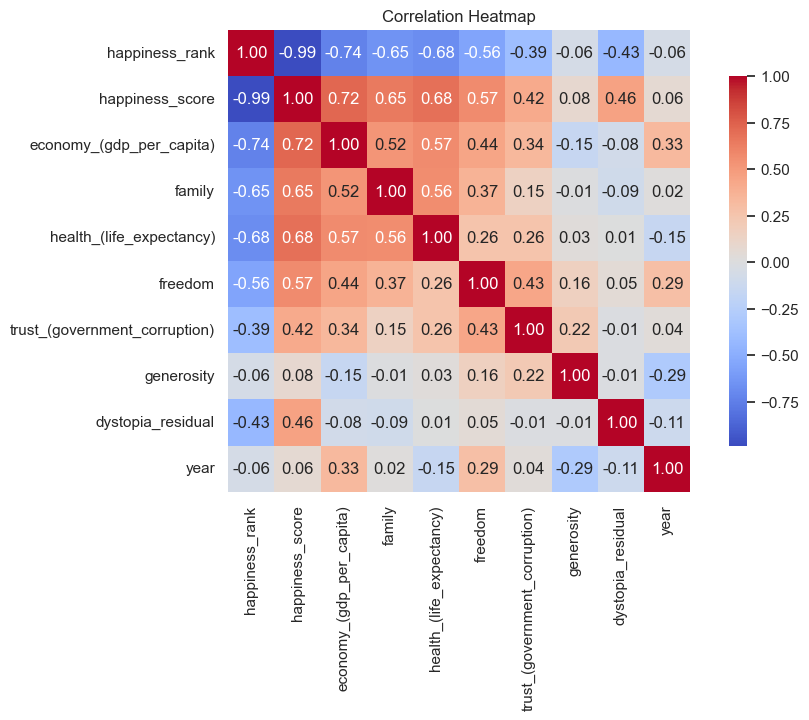

In [25]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

country,region,happiness_rank,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,year

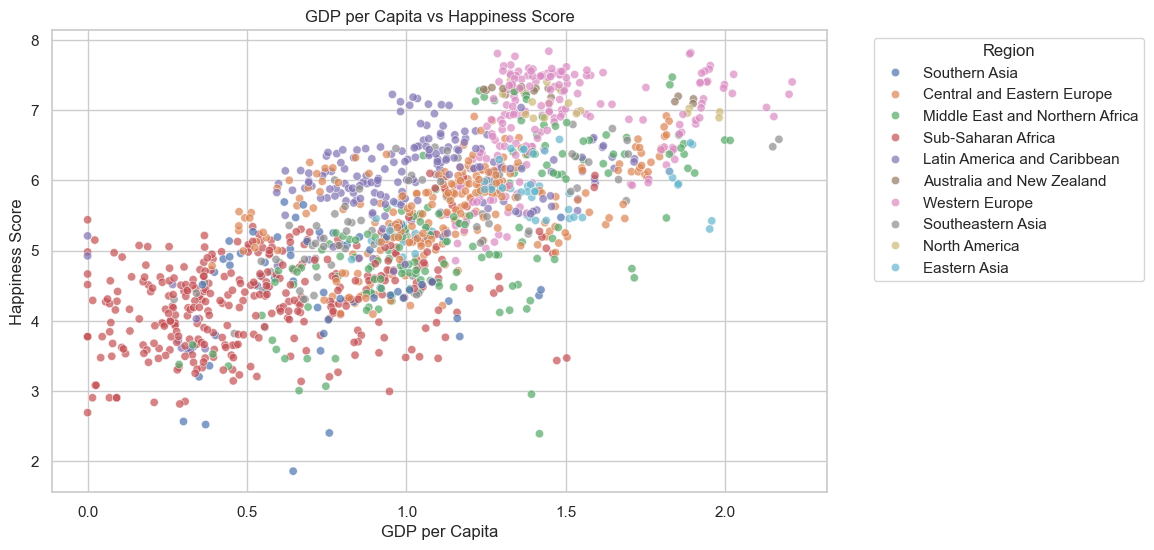

In [26]:
sns.scatterplot(data=df, x='economy_(gdp_per_capita)', y='happiness_score', hue='region', alpha=0.7)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')  
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

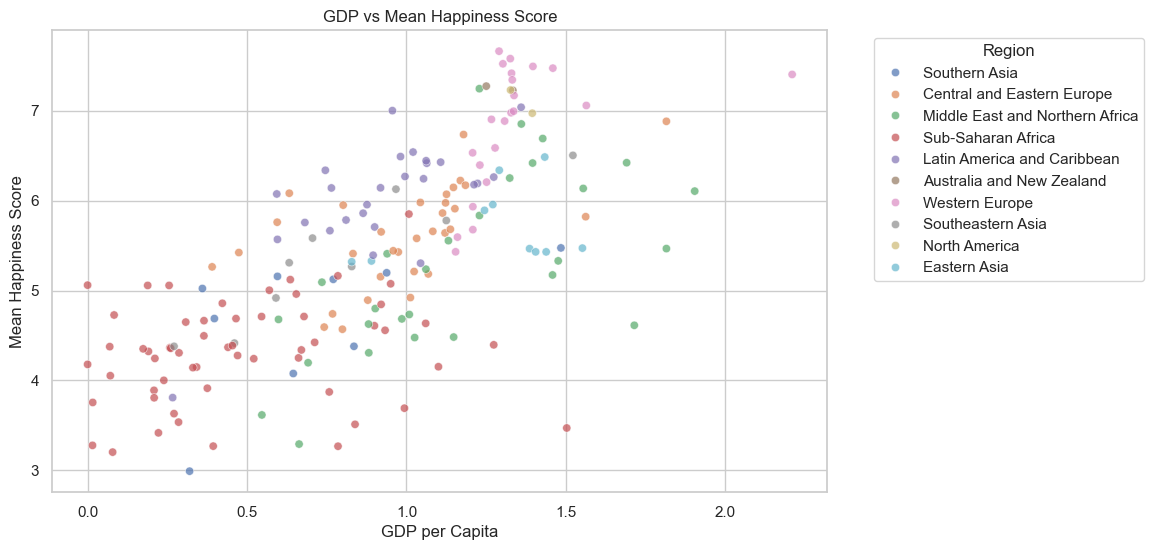

In [31]:
df['mean_happiness_score'] = df.groupby('country')['happiness_score'].transform('mean')
sns.scatterplot(data=df.drop_duplicates('country'), x='economy_(gdp_per_capita)', y='mean_happiness_score', hue='region', alpha=0.7)
#sns.scatterplot(data=df.drop_duplicates('country'), x='economy_(gdp_per_capita)', y='mean_happiness_score', color='black', marker='X', s=100, label='Mean Happiness Score')
plt.title('GDP vs Mean Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Mean Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\hjmar\AppData\Local\Temp\ipykernel_21124\401305941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='happiness_score', palette='Set3')


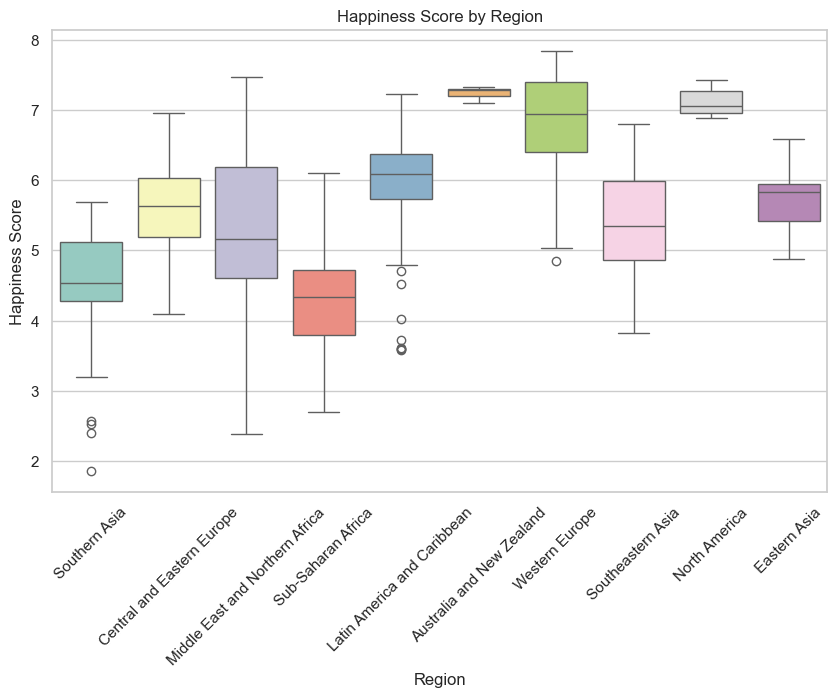

In [32]:
sns.boxplot(data=df, x='region', y='happiness_score', palette='Set3')
plt.title('Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

1) “Yearly average Happiness Index change”
2) “Are there countries who’s happiness was increasing for years, but had a sudden drop in recent years?”
3) “Is there a year(s) where the average world happiness decreased compared to last year?”
4) Geo data visualization.